In [28]:
import cv2
import numpy as np
import urllib.request as req
import tensorflow as tf
import torch

STRAWBERRY = 'strawberry'
LETTUCE = 'lettuce'
ROSEMARY = 'rosemary'
GERANIUM = 'geranium'

strawberry_dict = {
    'disease' : ['정상', '잿빛곰팡이병', '흰가루병', '해충'],
    'grow': ['1단계', '2단계', '3단계', '4단계', '5단계']
}
lettuce_dict = {
    'disease': ['정상', '균핵병', '노균병'],
    'grow': ['1단계', '2단계']
}
rosemary_dict = {
    'disease': ['정상', '흰가루병', '점무늬병', '해충']
}
geranium_dict = {
    'disease': ['정상', '갈색무늬병', '잿빛곰팡이병', '해충']
}

code_to_str = {
        STRAWBERRY : strawberry_dict, 
        LETTUCE: lettuce_dict, 
        ROSEMARY: rosemary_dict, 
        GERANIUM: geranium_dict}

def read_image_from_url(url, input_size = None) :
    resp = req.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype='uint8')
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if input_size is not None :
        image = cv2.resize(image, (input_size, input_size))
    return image / 255.

def read_image_from_dir(img_dir, input_size = None) :
    image = cv2.imread(img_dir)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if input_size is not None :
        image = cv2.resize(image, (input_size, input_size))
    return image / 255.
    
def load_plant_model(plant : str):
    if plant ==  STRAWBERRY :
        model = tf.keras.models.load_model('./strawberry_multi_output.h5') 
    elif plant == LETTUCE :
        model = tf.keras.models.load_model('./lettuce_multi_output.h5')
    elif plant == ROSEMARY:
        model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/best_rosemary.pt')
    elif plant == GERANIUM :
        model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/best_geranium.pt')
    return model

def inference(url, plant:str) :
    model = load_plant_model(plant)
    if plant == STRAWBERRY or plant == LETTUCE :
        # url? dir?
        image = read_image_from_url(url, 320)
        image = np.array([image])
        disease, grow = model.predict(image)
        disease = np.argmax(disease[0])
        grow = np.argmax(grow[0])    
        return {'disease' : code_to_str[plant]['disease'][disease],
               'grow' : code_to_str[plant]['grow'][grow]}
    
    elif plant == ROSEMARY or plant == GERANIUM :
        image = read_image_from_url(url)
        image = np.array([image])
        disease = model.predict(image)
        disease = np.argmax(disease[0])
        return {'disease': code_to_str[plant]['disease'][disease]}

In [26]:
def load_plant_model(plant : str):
    if plant ==  STRAWBERRY:
        print("a")
    elif plant == LETTUCE:
        print("b")
    elif plant == ROSEMARY:
        print("c")
    elif plant == GERANIUM:
        print("d")

In [27]:
STRAWBERRY = 'strawberry'
LETTUCE = 'lettuce'
ROSEMARY = 'rosemary'
GERANIUM = 'geranium'

load_plant_model(GERANIUM)

d


In [29]:
%%time
url = input()
inference(url, 'strawberry')

http://www.newsfm.kr/data/photos/20191148/art_15747461832645_746fed.jpg


2022-06-22 16:04:53.632094: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-22 16:04:53.635013: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-22 16:04:53.638509: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-06-22 16:05:04.118100: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-06-22 16:05:04.152104: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499995000 Hz


CPU times: user 16.7 s, sys: 1.83 s, total: 18.5 s
Wall time: 21 s


{'disease': '해충', 'grow': '5단계'}

In [7]:
%%time
url = 'https://blog.kakaocdn.net/dn/IWHqn/btqZDPS913r/2UwbBfBbrS8lmYsi9SW0YK/img.jpg'
inference(url, 'strawberry')

CPU times: user 17.2 s, sys: 1.6 s, total: 18.8 s
Wall time: 18.6 s


{'disease': '정상', 'grow': '3단계'}

In [11]:
%%time
url = input()
inference(url, 'strawberry')

http://www.newsfm.kr/data/photos/20191148/art_15747461832645_746fed.jpg
CPU times: user 13.4 s, sys: 470 ms, total: 13.8 s
Wall time: 15.1 s


{'disease': '흰가루병', 'grow': '5단계'}

흰가루병 : http://www.newsfm.kr/data/photos/20191148/art_15747461832645_746fed.jpg

In [20]:
import os

img_dir = os.listdir('/home/lab38/딸기')[0]
img_dir = os.path.join('/home/lab38/딸기', img_dir)

In [21]:
img_dir

'/home/lab38/딸기/V006_77_1_07_04_02_13_1_3321w_20201222_69_a0007.jpg'

In [28]:
def inference(url, plant:str) :
    model = load_plant_model(plant)
    if plant == STRAWBERRY or plant == LETTUCE :
        # url? dir?
        image = read_image_from_dir(url, 320)
        image = np.array([image])
        disease, grow = model.predict(image)
        disease = np.argmax(disease[0])
        grow = np.argmax(grow[0])    
        return {'disease' : code_to_str[plant]['disease'][disease],
               'grow' : code_to_str[plant]['grow'][grow]}

In [29]:
inference(img_dir, 'strawberry')

2022-06-21 16:22:08.055992: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-06-21 16:22:08.084167: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499995000 Hz


{'disease': '잿빛곰팡이병', 'grow': '2단계'}

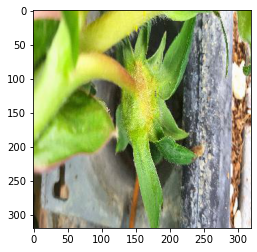

In [30]:
import matplotlib.pyplot as plt

aa = plt.imread(img_dir)
plt.imshow(aa)